# Presentation Plots

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from transit import occultnonlin, occultquad


In [52]:
ca=["#e27c7c", "#a86464", "#6d4b4b", "#503f3f", "#333333", "#3c4e4b", "#466964", "#599e94", "#6cd4c5"]

ca2=["#fafa6e","#d1f072","#aae479","#86d780","#64c987","#44b98d","#23aa8f","#00998f","#00898a","#007882","#176877","#245769","#2a4858"]


### 2D vs 3D sims

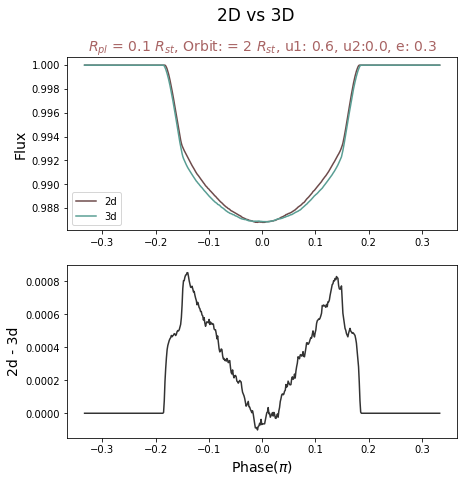

In [5]:
filename='../Sims/2d3d_0.1R_limb_circ.csv'
df = pd.read_csv(filename, sep=',')

plt.style.use('seaborn-bright')
fig, ax = plt.subplots(2,1, figsize=(7,7))
ax[0].plot(df['frame']/np.pi,df['2d'], label='2d', color=ca[2])
ax[0].plot(df['frame']/np.pi, df['3d'], label='3d',color=ca[7])
ax[1].plot(df['frame']/np.pi,df['2d']-df['3d'],color=ca[4])

ax[1].set_xlabel('Phase($\pi$)',size=14)
ax[1].set_ylabel('2d - 3d', size=14)
ax[0].set_ylabel('Flux', size=14)
ax[0].legend()

plt.suptitle('2D vs 3D', size=17)
ax[0].set_title("$R_{pl}$ = 0.1 $R_{st}$, Orbit: = 2 $R_{st}$, u1: 0.6, u2:0.0, e: 0.3", size=14, color=ca[1])

#plt.savefig('fprez_2d3d_0.1R_limb_kep.eps')
plt.show()

In [ ]:
filename='../Sims/2d3d_0.1R_limb_kep.csv'
df = pd.read_csv(filename, sep=',')

plt.style.use('seaborn-bright')
fig, ax = plt.subplots(2,1, figsize=(7,7))
ax[0].plot(df['frame']/np.pi,df['2d'], label='2d', color=ca[2])
ax[0].plot(df['frame']/np.pi, df['3d'], label='3d',color=ca[7])
ax[1].plot(df['frame']/np.pi,df['2d']-df['3d'],color=ca[4])

ax[1].set_xlabel('Phase($\pi$)',size=14)
ax[1].set_ylabel('2d - 3d', size=14)
ax[0].set_ylabel('Flux', size=14)
ax[0].legend()

plt.suptitle('2D vs 3D', size=17)
ax[0].set_title("$R_{pl}$ = 0.1 $R_{st}$, Orbit: = 2 $R_{st}$, u1: 0.6, u2:0.0, e: 0.3", size=14, color=ca[1])

plt.savefig('fprez_2d3d_0.1R_limb_kep.eps')
plt.show()

### Limb Darkening

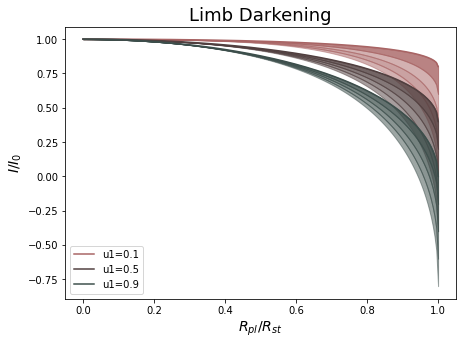

In [21]:
def ld(x,u,v):
    a=1
    y = 1-u*(1-np.sqrt(1 - x**2/a**2)) - v*(1-np.sqrt(1 - x**2/a**2))**2
    
    k = (1-u-5*v/3)*a + (u/4 + 2*v/4)*np.pi*a
    #k=(1-u)*a +np.pi*a*u/4
    #print(k)
    return(y)

xax = np.linspace(0,1,200)

fig, ax = plt.subplots(1,1,figsize=(7,5))
ax.set_title('Limb Darkening', size=18)
ax.set_xlabel('$R_{pl}$/$R_{st}$', size=14)
ax.set_ylabel('$I$/$I_0$', size=14)

ax.plot(xax, ld(xax, 0.1,0.1), label='u1=0.1',color=ca[1])
ax.fill_between(xax, ld(xax, 0.1,0.1), ld(xax, 0.1,0.3), color=ca[1], alpha=0.8)
ax.fill_between(xax, ld(xax, 0.1,0.3), ld(xax, 0.1,0.5), color=ca[1], alpha=0.5)
ax.fill_between(xax, ld(xax, 0.1,0.5), ld(xax, 0.1,0.7), color=ca[1], alpha=0.6)
ax.fill_between(xax, ld(xax, 0.1,0.7), ld(xax, 0.1,0.9), color=ca[1], alpha=0.5)
#ax.plot(xax, ld(xax, 0.1,0.9), label='u1=0.1',color=ca[1])

ax.plot(xax, ld(xax, 0.5,0.1), label='u1=0.5',color=ca[3])
ax.fill_between(xax, ld(xax, 0.5,0.1), ld(xax, 0.5,0.3), color=ca[3], alpha=0.8)
ax.fill_between(xax, ld(xax, 0.5,0.3), ld(xax, 0.5,0.5), color=ca[3], alpha=0.7)
ax.fill_between(xax, ld(xax, 0.5,0.5), ld(xax, 0.5,0.7), color=ca[3], alpha=0.6)
ax.fill_between(xax, ld(xax, 0.5,0.7), ld(xax, 0.5,0.9), color=ca[3], alpha=0.5)
#ax.plot(xax, ld(xax, 0.5,0.9), label='u1=0.5',color=ca[3])

ax.plot(xax, ld(xax, 0.9,0.1), label='u1=0.9',color=ca[5])
ax.fill_between(xax, ld(xax, 0.9,0.1), ld(xax, 0.9,0.3), color=ca[5], alpha=0.8)
ax.fill_between(xax, ld(xax, 0.9,0.3), ld(xax, 0.9,0.5), color=ca[5], alpha=0.7)
ax.fill_between(xax, ld(xax, 0.9,0.5), ld(xax, 0.9,0.7), color=ca[5], alpha=0.6)
ax.fill_between(xax, ld(xax, 0.9,0.7), ld(xax, 0.9,0.9), color=ca[5], alpha=0.5)
#ax.plot(xax, ld(xax, 0.9,0.9), label='u1=0.9',color=ca[5])

# ax.plot(xax, ld(xax, 0.4,0.1), label='u1=0.4 u2=0.1',color=ca[3])
# ax.plot(xax, ld(xax, 0.4,0.3), label='u1=0.4 u2=0.3',color=ca[3])
# ax.plot(xax, ld(xax, 0.4,0.5), label='u1=0.4 u2=0.5',color=ca[3])

# ax.plot(xax, ld(xax, 0.6,0.1), label='u1=0.6 u2=0.1',color=ca[5])
# ax.plot(xax, ld(xax, 0.8,0.1), label='u1=0.8 u2=0.1',color=ca[7])
ax.legend()

plt.savefig('fprez_ld.jpg')

### SNR Plot

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


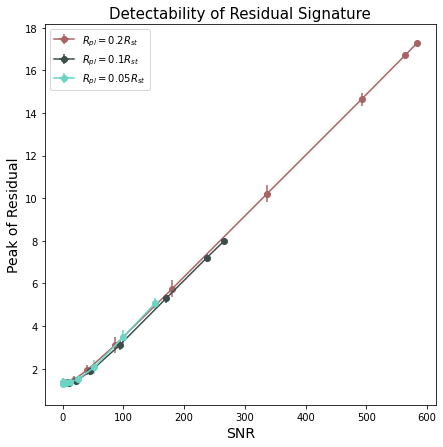

In [39]:
filename='../../plots/fprez_snrplot.csv'
df = pd.read_csv(filename, sep=',')
# print(df)
fig, ax = plt.subplots(1,1,figsize=(7,7))

ax.errorbar(df['0.2snr'],df['0.2peak'],df['0.2pkvar'],df['0.2snrvar'],label='$R_{pl}=0.2R_{st}$', color=ca[1], marker='o')
ax.errorbar(df['0.1snr'],df['0.1peak'],df['0.1pkvar'],df['0.1snrvar'],label='$R_{pl}=0.1R_{st}$', color=ca[5],marker='o')
ax.errorbar(df['0.05snr'],df['0.05peak'],df['0.05pkvar'],df['0.05snrvar'],label='$R_{pl}=0.05R_{st}$', color=ca[8],marker='o')
ax.legend()
ax.set_ylabel('Peak of Residual', size=14)
ax.set_xlabel('SNR', size=14)
ax.set_title('Detectability of Residual Signature', size=15)

plt.savefig('frpez_snrplot.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


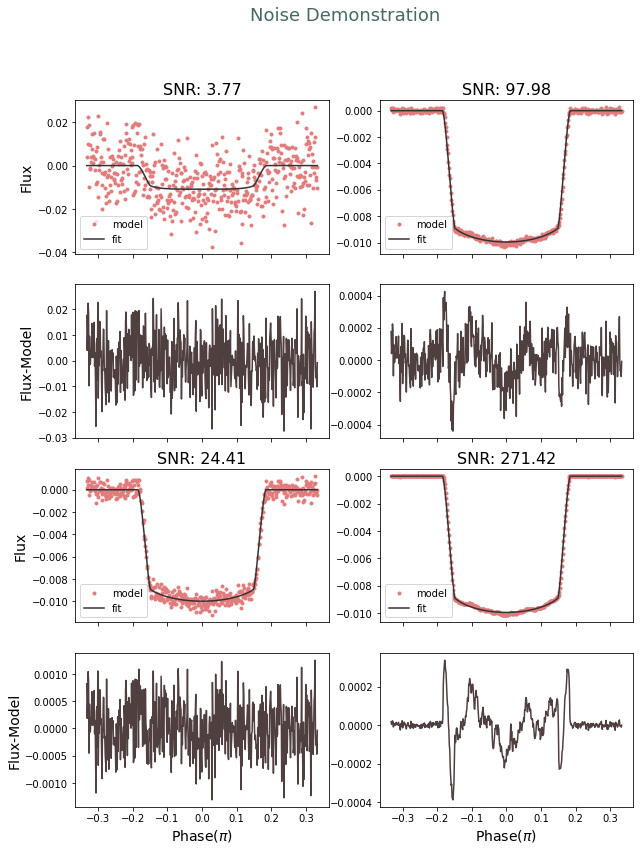

In [40]:
filename='../../plots/fprez_noiselist.csv'
df = pd.read_csv(filename, sep=',')
# print(df)
fig, ax = plt.subplots(4,2,figsize=(10,13),sharex=True)

snr='3.77'

ax[0][0].plot(df['phase'],df['mod'+snr], label='model', color=ca[0], marker='.', ls='None')
ax[0][0].plot(df['phase'],df['tr'+snr], label='fit', color=ca[4])
ax[1][0].plot(df['phase'],df['mod'+snr]-df['tr'+snr], color=ca[3])
ax[0][0].legend()
ax[0][0].set_ylabel('Flux', size=14)
ax[1][0].set_ylabel('Flux-Model', size=14)
ax[0][0].set_title('SNR: '+snr, size=16)

snr='24.41'

ax[2][0].plot(df['phase'],df['mod'+snr], label='model', color=ca[0], marker='.', ls='None')
ax[2][0].plot(df['phase'],df['tr'+snr], label='fit', color=ca[4])
ax[3][0].plot(df['phase'],df['mod'+snr]-df['tr'+snr], color=ca[3])
ax[2][0].legend()
ax[2][0].set_ylabel('Flux', size=14)
ax[3][0].set_ylabel('Flux-Model', size=14)
ax[2][0].set_title('SNR: '+snr, size=16)

snr='97.98'

ax[0][1].plot(df['phase'],df['mod'+snr], label='model', color=ca[0], marker='.', ls='None')
ax[0][1].plot(df['phase'],df['tr'+snr], label='fit', color=ca[4])
#ax[1][1].plot(df['phase'],df['res'+snr], color=ca[3])
ax[1][1].plot(df['phase'],df['mod'+snr]-df['tr'+snr], color=ca[3])
ax[0][1].legend()
ax[0][1].set_title('SNR: '+snr, size=16)

snr='271.42'

ax[2][1].plot(df['phase'],df['mod'+snr], label='model', color=ca[0], marker='.', ls='None')
ax[2][1].plot(df['phase'],df['tr'+snr], label='fit', color=ca[4])
ax[3][1].plot(df['phase'],df['mod'+snr]-df['tr'+snr], color=ca[3])
ax[2][1].legend()
ax[2][1].set_title('SNR: '+snr, size=16)

ax[3][0].set_xlabel('Phase($\pi$)', size=14)
ax[3][1].set_xlabel('Phase($\pi$)', size=14)

plt.suptitle('Noise Demonstration', size=18, color=ca[6])

plt.savefig('fprez_noise.eps')


### Real Data

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


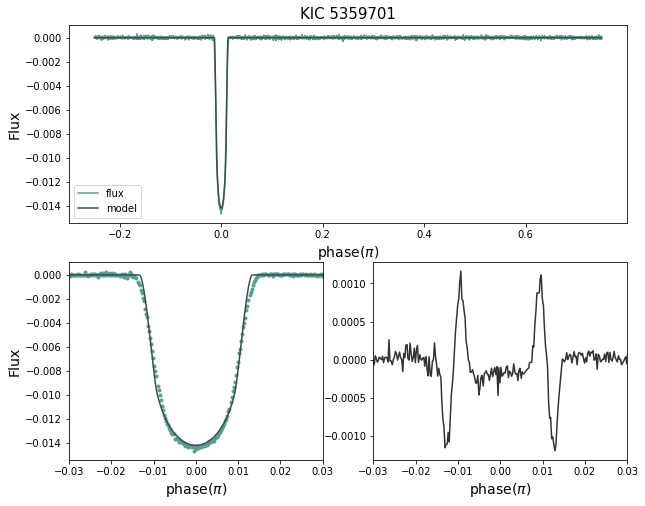

In [45]:
filename='../../plots/fprez_5359701.csv'
df = pd.read_csv(filename, sep=',')
# print(df)

plt.style.use('seaborn-bright')
fig = plt.figure(figsize=(10,8))
ax1 = plt.subplot2grid((2,2), (0, 0), rowspan=1, colspan=2)
ax2 = plt.subplot2grid((2,2), (1,0), colspan=1)
ax3 = plt.subplot2grid((2,2), (1,1), rowspan=1)

ax1.plot(df['phase'],df['flux'],color=ca[7],label='flux')
ax1.plot(df['phase'],df['model'],color=ca[5],label='model')
ax2.plot(df['phase'],df['flux'],color=ca[7], marker='.',ls='None')
ax2.plot(df['phase'],df['model'],color=ca[5])
ax3.plot(df['phase'], df['flux']-df['model'],color=ca[4])

ax2.set_xlim(-0.03,0.03)
ax3.set_xlim(-0.03,0.03)

ax1.legend()
ax1.set_ylabel('Flux', size=14)
ax1.set_xlabel('phase($\pi$)', size=14)
ax2.set_ylabel('Flux', size=14)
ax2.set_xlabel('phase($\pi$)', size=14)
#ax3.set_ylabel('Flux-Model', size=14)
ax3.set_xlabel('phase($\pi$)', size=14)
#ax1.set_title('KIC 5359701\n $R_{pl}=0.11R_{st}$, $R_{orb}=11.19R_{st}$, $u_1$ = 0.53, $u_2$ =0.15 , b=0.602', size=15)
#ax1.set_title('KIC 8110757\n $R_{pl}=0.037R_{st}$, $R_{orb}=3.51R_{st}$, $u_1$ = 0.397, $u_2$ =0.265 , b=0', size=15)
ax1.set_title('KIC 5359701', size=15)

plt.savefig('frpez_kic5359701.eps')
plt.show()


### Simple & Multi Planet

[1.98577353e-01 7.48631522e-01 2.95429090e-19 4.96330765e+00
 1.37960314e-08]


c:\Users\Hp\Documents\FYProj\alienworlds\Plot_Codes\transit.py:829: RuntimeWarning: invalid value encountered in sqrt
  k = 0.5 * np.sqrt((1. - a) / (z * p))  # 8%


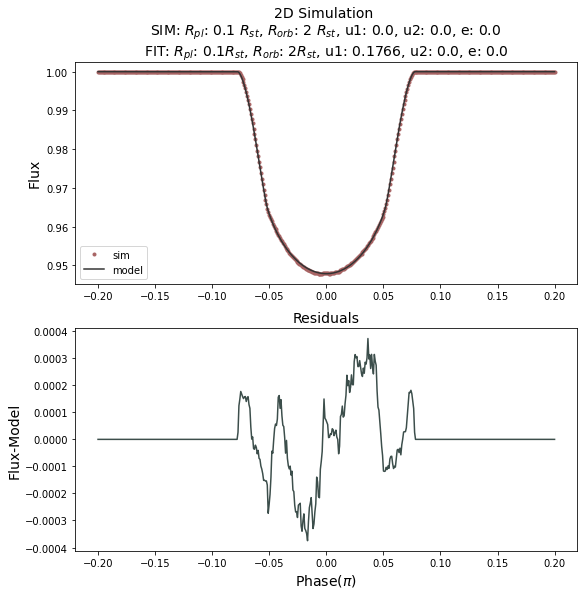

In [53]:
from scipy.optimize import curve_fit
filename='../Sims/2d3d_0.2R_limb_circ_corr.csv'

df = pd.read_csv(filename, sep=',')
fig, ax = plt.subplots(2,1,figsize=(9,9))

def new_plar_ma(ph,p,u1,u2,rorb,imp):
    znp = np.sqrt(np.abs(rorb*np.sin(ph*np.pi))**2+imp**2)
    a= occultquad(znp,p,[u1,u2])  
    return(a) 

popt1, pcov1 = curve_fit(new_plar_ma, np.array(df['frame'])/np.pi, np.array(df['3d']), 
    bounds=([0,0,0,1,0], [1,1,1,40,1]))
print(popt1)
model=new_plar_ma(df['frame']/np.pi,*popt1)
ax[0].plot(df['frame']/np.pi,df['3d'],label='sim', marker='.',ls='None',color=ca[1])
ax[0].plot(df['frame']/np.pi,model, label='model',color=ca[4])
ax[0].legend()
ax[0].set_ylabel('Flux', size=14)
ax[1].set_ylabel('Flux-Model', size=14)
ax[1].set_xlabel('Phase($\pi$)', size=14)
ax[1].set_title('Residuals', size=14)
ax[0].set_title('2D Simulation \nSIM: $R_{pl}$: 0.1 $R_{st}$, $R_{orb}$: 2 $R_{st}$, u1: 0.0, u2: 0.0, e: 0.0 \nFIT: $R_{pl}$: 0.1$R_{st}$, $R_{orb}$: 2$R_{st}$, u1: 0.1766, u2: 0.0, e: 0.0', size=14)
#ax[0].set_title('3D Simulation \n$R_{pl}$: 0.1 $R_{st}$, $R_{orb}$: 2 $R_{st}$, u1: 0.0, u2: 0.0, e: 0.0', size=14)

ax[1].plot(df['frame']/np.pi,df['3d']-model, color=ca[5])
#plt.savefig('fprez_2dfit3d.jpg')

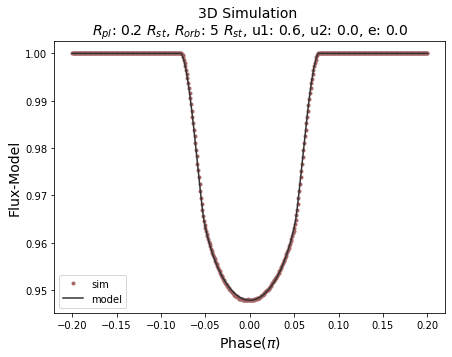

In [54]:
fig, ax = plt.subplots(1,1,figsize=(7,5))
ax.plot(df['frame']/np.pi,df['3d'],label='sim', marker='.',ls='None',color=ca[1])
ax.plot(df['frame']/np.pi,model, label='model',color=ca[4])
ax.legend()
ax.set_ylabel('Flux', size=14)
ax.set_ylabel('Flux-Model', size=14)
ax.set_xlabel('Phase($\pi$)', size=14)
ax.set_title('Residuals', size=14)
#ax[0].set_title('2D Simulation \nSIM: $R_{pl}$: 0.1 $R_{st}$, $R_{orb}$: 2 $R_{st}$, u1: 0.0, u2: 0.0, e: 0.0 \nFIT: $R_{pl}$: 0.1$R_{st}$, $R_{orb}$: 2$R_{st}$, u1: 0.1794, u2: 0.0, e: 0.0', size=14)
ax.set_title('3D Simulation \n$R_{pl}$: 0.2 $R_{st}$, $R_{orb}$: 5 $R_{st}$, u1: 0.6, u2: 0.0, e: 0.0', size=14)

plt.savefig('frpez_plsim.jpg')

### Organized Swarms

(200, 12)


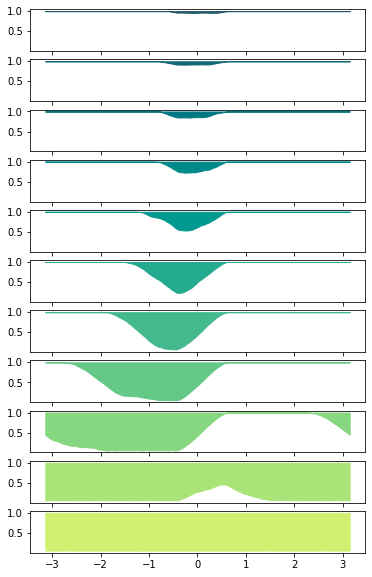

In [7]:
arr = np.loadtxt('../../plots/Sim_stash/sphere_conc_org_1.csv')
print(arr.shape)

fig, ax = plt.subplots(11,1,figsize=(6,10), sharey=True, sharex=True)

for i in range(1,12):
    ax[i-1].fill_between(arr[:,0], arr[:,i],np.ones(len(arr[:,i])), color=ca2[12-i])
# ax.legend()
# ax.set_ylabel('Peak of Residual', size=14)
# ax.set_xlabel('SNR', size=14)
# ax.set_title('Detectability of Residual Signature', size=15)

#plt.savefig('frpez_snrplot.jpg')


### Tide Signature

In [16]:
from ellc import lc
def new_plar_fl(ph,p,u1,u2,rorb, imp, hf1,hf2):
    incl = np.arccos(imp/rorb)*180/np.pi
    a= lc(ph,radius_1=1/rorb,radius_2=p/rorb,sbratio=0.0,incl=incl,ld_1='quad',ldc_1=[u1,u2],
        shape_1='sphere', shape_2='love',hf_1=hf1, hf_2=hf2)
    return(a -1) 
def new_plar_rg(ph,p,u1,u2,rorb, imp):
    incl = np.arccos(imp/rorb)*180/np.pi
    a= lc(ph,radius_1=1/rorb,radius_2=p/rorb,sbratio=0.0,incl=incl,ld_1='quad',ldc_1=[u1,u2],
        shape_1='sphere', shape_2='sphere')
    return(a -1) 

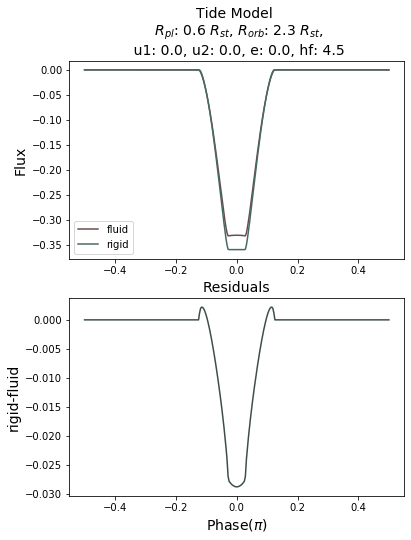

In [42]:
ph = np.linspace(-0.5,0.5,300)
flux = new_plar_fl(ph, 0.6, 0.0, 0.0, 2.3, 0.0, 4.5,4.5)
flux2 = new_plar_rg(ph, 0.6, 0.0, 0.0, 2.3, 0.0)

fig, ax = plt.subplots(2,1,figsize=(6,8))


ax[0].set_ylabel('Flux', size=14)
ax[1].set_ylabel('rigid-fluid', size=14)
ax[1].set_xlabel('Phase($\pi$)', size=14)
ax[1].set_title('Residuals', size=14)
ax[0].set_title('Tide Model \n $R_{pl}$: 0.6 $R_{st}$, $R_{orb}$: 2.3 $R_{st}$,\n u1: 0.0, u2: 0.0, e: 0.0, hf: 4.5', size=14)

ax[0].plot(ph, flux, label='fluid', color=ca[2])
ax[0].plot(ph,flux2, label='rigid', color=ca[6])
ax[0].legend()
ax[1].plot(ph, flux2-flux, color=ca[5])

plt.savefig('fprez_tide.png')

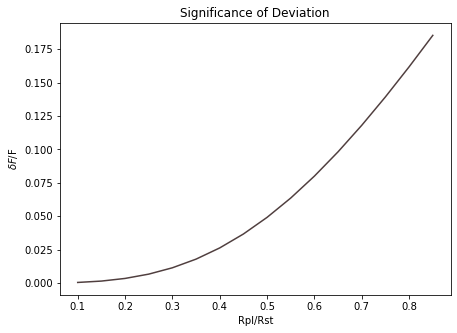

In [48]:
#tide sim with area of planet to star
devarr = []
for sz in np.arange(0.1,0.9,0.05):
    ph = np.linspace(-0.5,0.5,300)
    flux_fl = new_plar_fl(ph, sz, 0.0, 0.0, 2.3, 0.0, 4.5,4.5)
    flux_rg = new_plar_rg(ph, sz, 0.0, 0.0, 2.3, 0.0)
    dev = np.abs(max(flux_fl-flux_rg)/min(flux_rg))
    devarr.append(dev)
np.arange(0.1,0.9,0.1)

fig, ax = plt.subplots(1,1, figsize=(7,5))
ax.set_title('Significance of Deviation')
ax.plot(np.arange(0.1,0.9,0.05),devarr, color=ca[3])
ax.set_xlabel('Rpl/Rst')
ax.set_ylabel('$\delta F$/F')
plt.savefig('fprez_tidesig.png')

    

### Activation functions

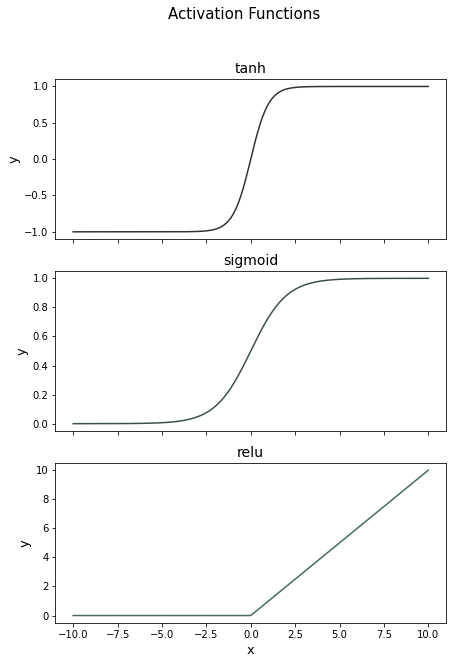

In [49]:
fig, ax = plt.subplots(3,1, figsize=(7,10), sharex=True)
x = np.linspace(-10,10,300)
y = np.linspace(-5,5,10)

th = np.tanh(x)
sig = 1/(1+np.exp(-x))
relu = [i if i>0 else 0 for i in x]
sftmx_arr = [np.exp(x)/(np.exp(x)+np.exp(m)) for m in y]

plt.suptitle('Activation Functions', size=15)
ax[0].plot(x,th, color=ca[4])
ax[0].set_title('tanh', size=14)
ax[1].plot(x,sig, color=ca[5])
ax[1].set_title('sigmoid', size=14)
ax[2].plot(x,relu, color=ca[6])
ax[2].set_title('relu', size=14)
ax[2].set_xlabel('x', size=13)
ax[2].set_ylabel('y', size=13)
ax[1].set_ylabel('y', size=13)
ax[0].set_ylabel('y', size=13)
plt.savefig('fprez_act_func.eps')
# for i in range(10):
#     ax[1][1].plot(x,sftmx_arr[i])
# ax[0][0].set_title('tanh')

### The Grid

In [3]:
from interpolation import load_grids

points, vals, phases = load_grids()
rpl_arr, rorb_arr, b_arr, u1_arr, u2_arr = points

min_fl_rpl=[]
for el in np.array(vals)[:,0,0,0,0,:]:
    min_fl_rpl.append(1-min(el))

min_td_rorb=[]
for ph,fl in zip(np.array(phases)[7,:,:],np.array(vals)[7,:,0,0,0,:]):
    min_td_rorb.append(2*ph[-1]*(fl<1).sum()/300)


(10, 10, 7, 10, 3, 300) (10, 10, 300)


In [4]:
min_b_rpl=[]
for el in np.array(vals)[9,0,:,0,0,:]:
    min_b_rpl.append(1-min(el))

min_b_rorb=[]
ffphh = np.array(phases)[9,0,-1]
for fl in np.array(vals)[9,0,:,0,0,:]:
    min_b_rorb.append(2*ffphh*(fl<1).sum()/300)
    print(2*ffphh*(fl<1).sum()/300)

1.4660765716752366
1.452113937659282
1.424188669627373
1.3683381335635543
1.2845623294678263
1.137954672300303
0.85870199198121


No handles with labels found to put in legend.
No handles with labels found to put in legend.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


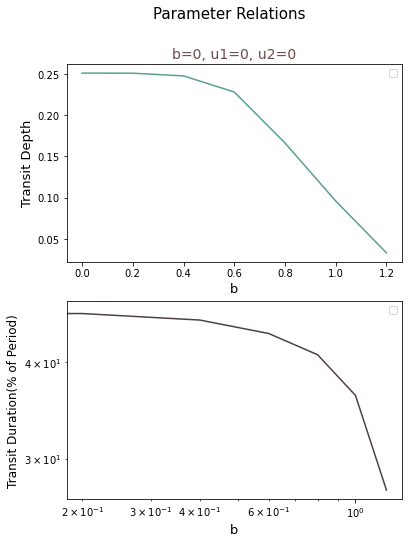

In [6]:
fig, ax = plt.subplots(2,1,figsize=(6,8))
plt.suptitle('Parameter Relations',size=15)
ax[0].set_title('b=0, u1=0, u2=0', color=ca[2], size=14)
#ax[0].plot(rpl_arr, min_fl_rpl,color=ca[7], label='Rorb=2.04 Rst')
ax[0].plot(b_arr, min_b_rpl,color=ca[7])
#ax[0].set_xlabel('$R_{pl}/R_{st}$',size=13)
ax[0].set_xlabel('b',size=13)
ax[0].set_ylabel('Transit Depth',size=13)
#ax[1].plot(rorb_arr, np.array(min_td_rorb)*100/np.pi,color=ca[3], label='Rpl = 0.39 Rst')
ax[1].plot(b_arr, np.array(min_b_rorb)*100/np.pi,color=ca[3])
#ax[1].set_xlabel('$R_{orb}/R_{st}$',size=13)
ax[1].set_xlabel('b',size=13)
ax[1].set_ylabel('Transit Duration(% of Period)',size=12)
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[0].legend()
ax[1].legend()
plt.savefig('fprez_2d_parrel_demo2.eps')

### Clean and Dirty LC

(20, 200)
(6, 200)
(2, 200)
(20, 200)


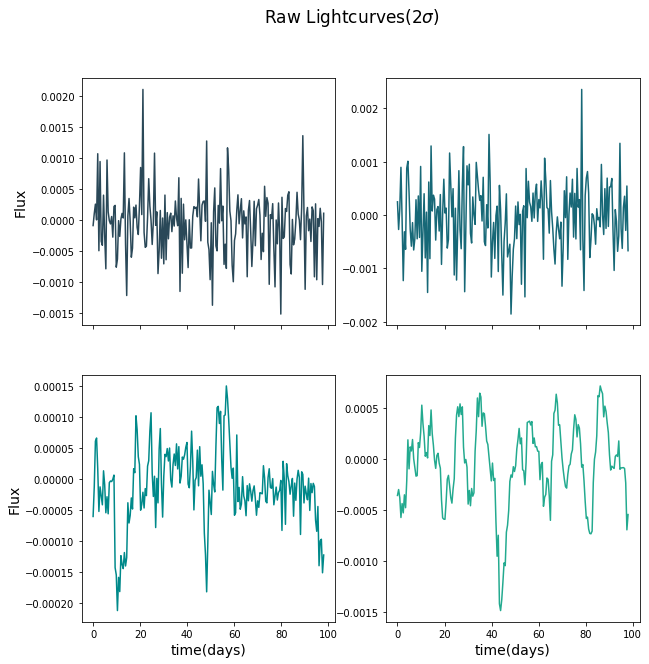

In [36]:
filepath='E:\\Masters_Project_Data\\data_red_raw_dirty200\\'
entries = os.listdir(filepath)

fig, ax = plt.subplots(2,2, figsize=(10,10), sharex=True)
xax=np.linspace(0,200*29.4/60,200)
m = [0,7,1,9]
for i,x in zip(range(4),ax.ravel()):
    arr=np.loadtxt(filepath+entries[m[i]])
    print(arr.shape)
    x.plot(xax,arr[0], color=ca2[12-2*i])

ax[1][1].set_xlabel('time(days)', size=14)
ax[1][0].set_xlabel('time(days)', size=14)
ax[1][0].set_ylabel('Flux', size=14)
ax[0][0].set_ylabel('Flux', size=14)
plt.suptitle('Raw Lightcurves(2$\sigma$)', size=17)

plt.savefig('fprez_raw_dirty.jpg')